In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyarrow.feather as feather
import gymnasium as gym
from gymnasium import spaces
import random
import time
from collections import deque
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_pickle("s_clean_2017CIC.pickle")

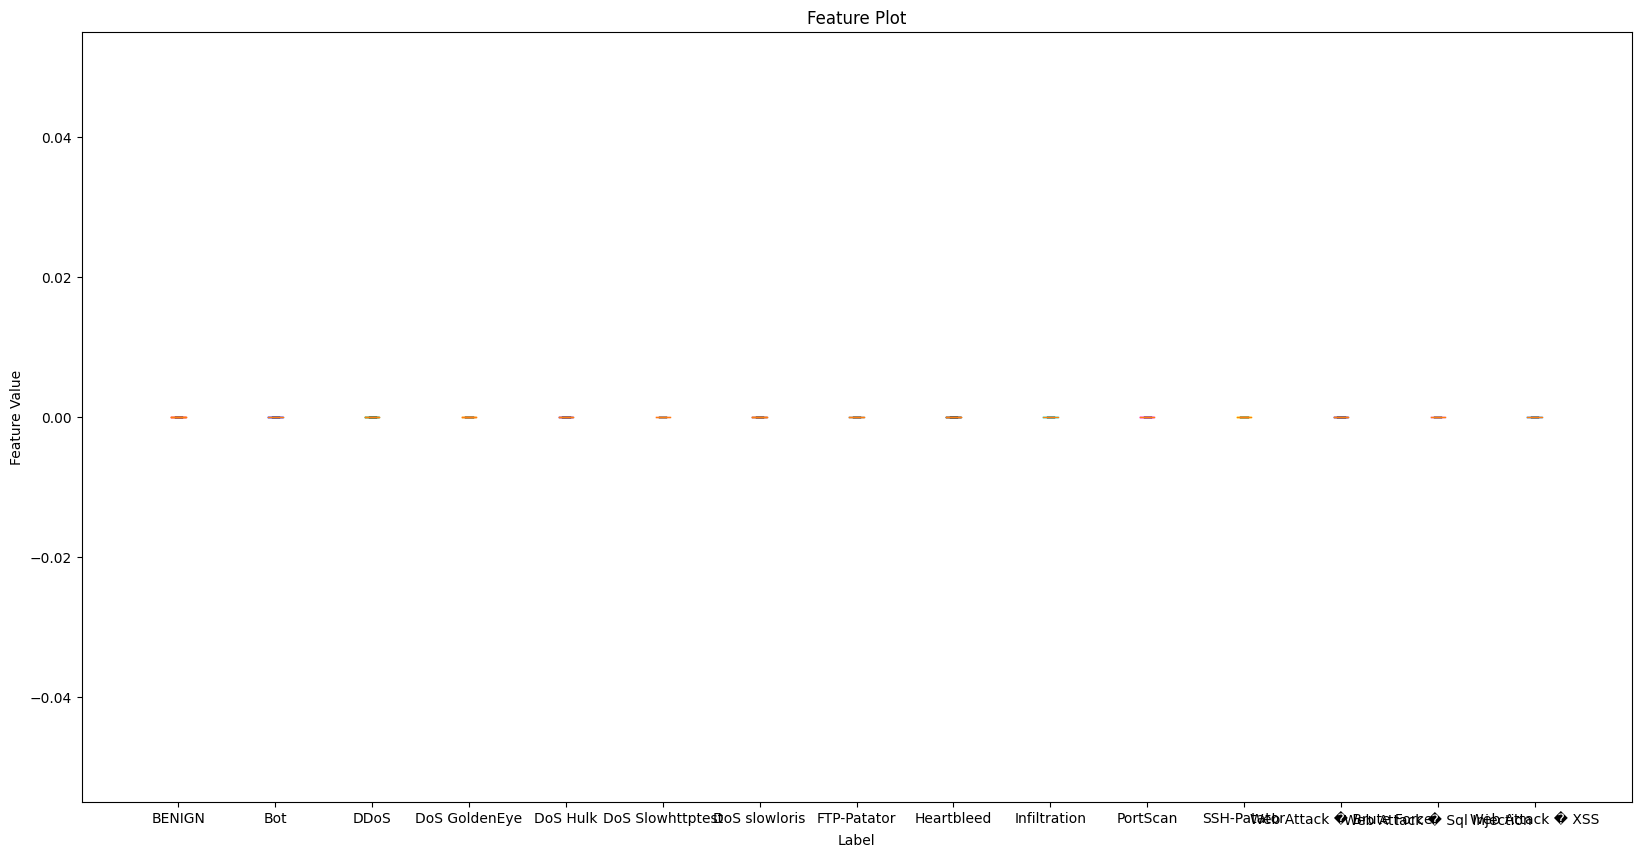

In [4]:
df_filtered = df.sort_values(by=' Label')

max_packet_length_values = df_filtered[' Bwd Avg Bytes/Bulk']
labels = df_filtered[' Label']

# Get the unique labels
unique_labels = np.unique(labels)

# Choose a different color for each label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'grey', 'black', 'cyan', 'magenta', 'yellow', 'indigo', 'violet', 'dodgerblue']
label_colors = {label: color for label, color in zip(unique_labels, colors)}

plt.figure(figsize=(20,10))

# Plot each label with a different color as a boxplot
n = len(unique_labels)
x_pos = np.arange(1, n + 1)

for i, label in enumerate(unique_labels):
    label_mask = labels == label
    data = max_packet_length_values[label_mask]
    bp = plt.boxplot(data, positions=[x_pos[i]], labels=[label], boxprops=dict(color=label_colors[label]))

plt.xlim(0, n + 1)
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.title('Feature Plot')
plt.show()

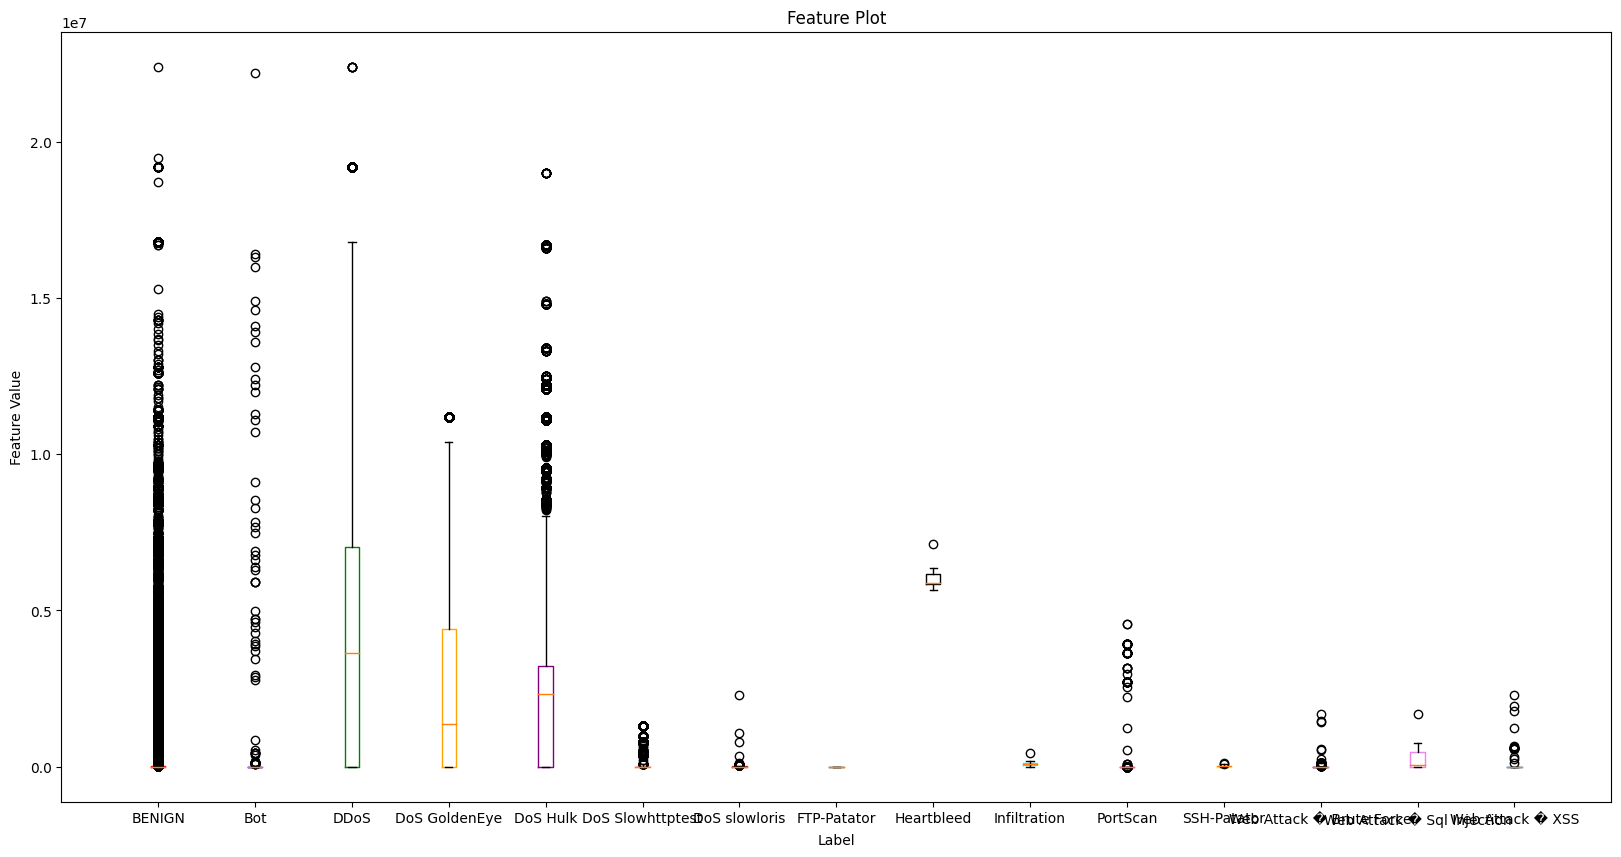

In [6]:
df_filtered = df.sort_values(by=' Label')

max_packet_length_values = df_filtered[' Packet Length Variance']
labels = df_filtered[' Label']

# Get the unique labels
unique_labels = np.unique(labels)

# Choose a different color for each label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'grey', 'black', 'cyan', 'magenta', 'yellow', 'indigo', 'violet', 'dodgerblue']
label_colors = {label: color for label, color in zip(unique_labels, colors)}

plt.figure(figsize=(20,10))

# Plot each label with a different color as a boxplot
n = len(unique_labels)
x_pos = np.arange(1, n + 1)

for i, label in enumerate(unique_labels):
    label_mask = labels == label
    data = max_packet_length_values[label_mask]
    bp = plt.boxplot(data, positions=[x_pos[i]], labels=[label], boxprops=dict(color=label_colors[label]))

plt.xlim(0, n + 1)
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.title('Feature Plot')
plt.show()

In [1]:
import pandas as pd
griddf = pd.read_feather("gridresults.feather")
griddf

layers  neurons                                           progress  \
0        0        0                                    [0.0, 0.0, 0.0]   
1        2        2  [0.484375, 0.503125, 0.55, 0.5125, 0.540625, 0...   
2        2        4  [0.478125, 0.50625, 0.496875, 0.45, 0.4875, 0....   
3        2        8  [0.509375, 0.4625, 0.5, 0.51875, 0.46875, 0.52...   
4        2       16  [0.525, 0.44375, 0.478125, 0.4625, 0.515625, 0...   
5        2       32  [0.49375, 0.471875, 0.484375, 0.5125, 0.525, 0...   
6        2       64  [0.475, 0.5, 0.453125, 0.4625, 0.4625, 0.48437...   
7        2      128  [0.509375, 0.49375, 0.475, 0.5125, 0.50625, 0....   
8        2      256  [0.46875, 0.49375, 0.51875, 0.5125, 0.553125, ...   
9        2      512  [0.496875, 0.45625, 0.465625, 0.446875, 0.4906...   
10       3        2  [0.54375, 0.528125, 0.48125, 0.49375, 0.559375...   
11       3        4  [0.484375, 0.5, 0.478125, 0.496875, 0.53125, 0...   
12       3        8  [0.484375, 0.54375, 0.553125, 0.509375, 0.525,...   
13       3       16  [0.471875, 0.525, 0.54375, 0.5625, 0.4875, 0.5...   
14       3       32  [0.521875, 0.471875, 0.503125, 0.5, 0.465625, ...   
15       3       64  [0.51875, 0.48125, 0.571875, 0.521875, 0.53437...   
16       3      128  [0.515625, 0.51875, 0.53125, 0.503125, 0.5, 0....   
17       3      256  [0.5, 0.471875, 0.559375, 0.503125, 0.525, 0.5...   
18       3      512  [0.453125, 0.484375, 0.49375, 0.45, 0.503125, ...   
19       4        2  [0.503125, 0.471875, 0.534375, 0.490625, 0.521...   
20       4        4  [0.490625, 0.521875, 0.515625, 0.503125, 0.496...   
21       4        8  [0.48125, 0.48125, 0.50625, 0.503125, 0.496875...   
22       4       16  [0.5, 0.521875, 0.534375, 0.490625, 0.565625, ...   
23       4       32  [0.48125, 0.53125, 0.478125, 0.525, 0.478125, ...   
24       4       64  [0.528125, 0.525, 0.496875, 0.496875, 0.5125, ...   
25       4      128  [0.490625, 0.48125, 0.490625, 0.49375, 0.49375...   
26       4      256  [0.5375, 0.496875, 0.48125, 0.471875, 0.484375...   
27       4      512  [0.48125, 0.475, 0.465625, 0.48125, 0.484375, ...   
28      10        2  [0.503125, 0.46875, 0.525, 0.54375, 0.50625, 0...   
29      10        4  [0.515625, 0.5, 0.51875, 0.503125, 0.49375, 0....   
30      10        8  [0.515625, 0.528125, 0.465625, 0.4625, 0.45937...   
31      10       16  [0.484375, 0.559375, 0.465625, 0.525, 0.4875, ...   
32      10       32  [0.534375, 0.528125, 0.4625, 0.534375, 0.45, 0...   
33      10       64  [0.478125, 0.503125, 0.484375, 0.484375, 0.496...   
34      10      128  [0.4875, 0.515625, 0.490625, 0.478125, 0.51875...   
35      10      256  [0.459375, 0.490625, 0.496875, 0.5625, 0.50625...   
36       8        2  [0.496875, 0.528125, 0.490625, 0.46875, 0.5187...   
37       8        4  [0.50625, 0.5, 0.5125, 0.51875, 0.471875, 0.52...   
38       8        8  [0.490625, 0.496875, 0.53125, 0.528125, 0.4906...   
39       8       16  [0.465625, 0.484375, 0.484375, 0.4875, 0.47812...   
40       8       32  [0.496875, 0.534375, 0.5125, 0.521875, 0.44062...   
41       8       64  [0.525, 0.4875, 0.509375, 0.4875, 0.50625, 0.5...   
42       8      128  [0.4875, 0.490625, 0.51875, 0.4875, 0.4375, 0....   
43       8      256  [0.49375, 0.521875, 0.53125, 0.55, 0.4875, 0.4...   
44       8      512  [0.503125, 0.540625, 0.478125, 0.5375, 0.55625...   

      traintime  
0      0.000000  
1  -1735.979855  
2  -1823.179430  
3   1728.703833  
4   1796.003145  
5   1885.860660  
6   3505.070723  
7   2040.191225  
8   3495.541258  
9   3696.988947  
10  1709.758342  
11  1771.069493  
12  1866.315844  
13  1707.653691  
14  1787.994323  
15  1895.602404  
16  1719.590602  
17  1858.040808  
18  2075.264653  
19  1726.643606  
20  1762.464059  
21  1902.519977  
22  1712.062022  
23  3595.283538  
24  3772.692953  
25  1712.589260  
26  1826.053931  
27  2020.093429  
28  1725.949968  
29  1825.951041  
30  1940.995919  
31  1713.175294  
32  1

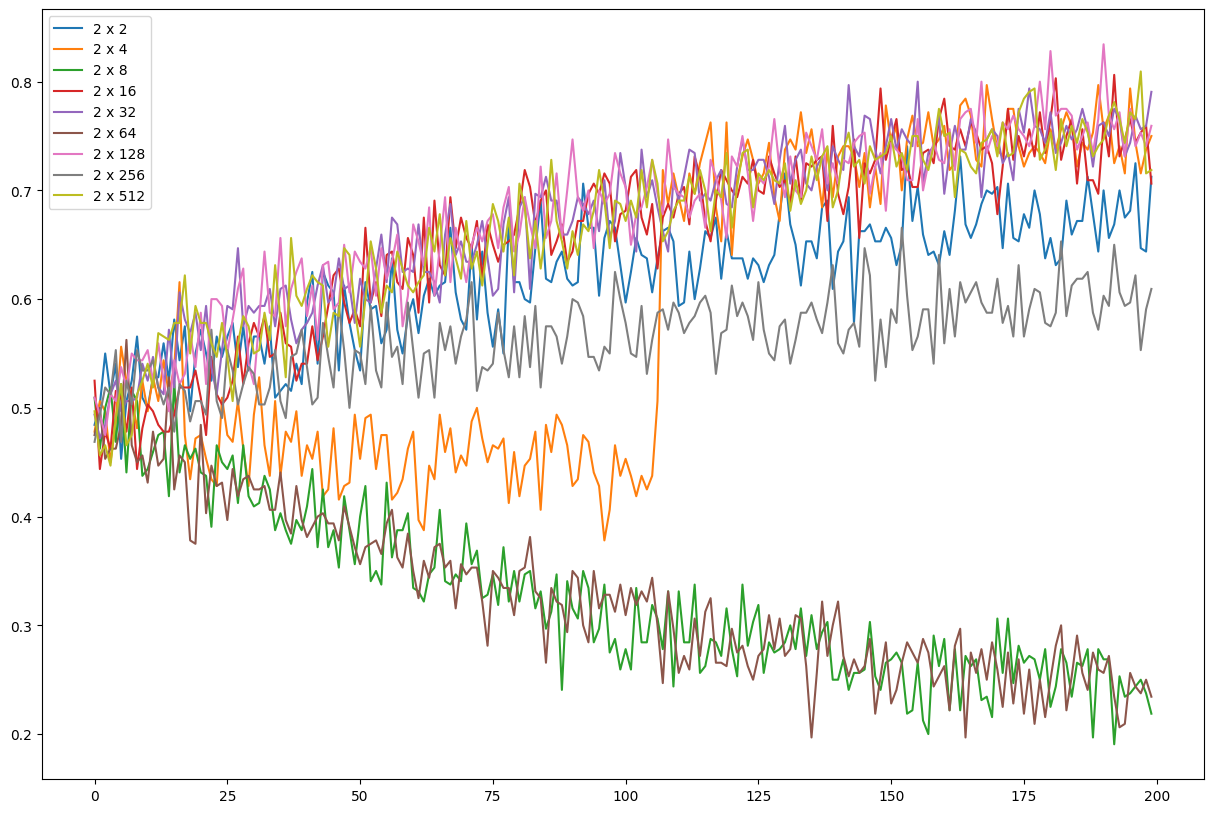

In [4]:

plt.figure(figsize=(15,10))
acc2x2 =griddf["progress"][1]
acc2x4 =griddf["progress"][2]
acc2x8 =griddf["progress"][3]
acc2x16 =griddf["progress"][4]
acc2x32 =griddf["progress"][5]
acc2x64 =griddf["progress"][6]
acc2x128 =griddf["progress"][7]
acc2x256 =griddf["progress"][8]
acc2x512 =griddf["progress"][9]
plt.plot(acc2x2, label='2 x 2')
plt.plot(acc2x4, label='2 x 4')
plt.plot(acc2x8, label='2 x 8')
plt.plot(acc2x16, label='2 x 16')
plt.plot(acc2x32, label='2 x 32')
plt.plot(acc2x64, label='2 x 64')
plt.plot(acc2x128, label='2 x 128')
plt.plot(acc2x256, label='2 x 256')
plt.plot(acc2x512, label='2 x 512')
plt.legend()
plt.show()

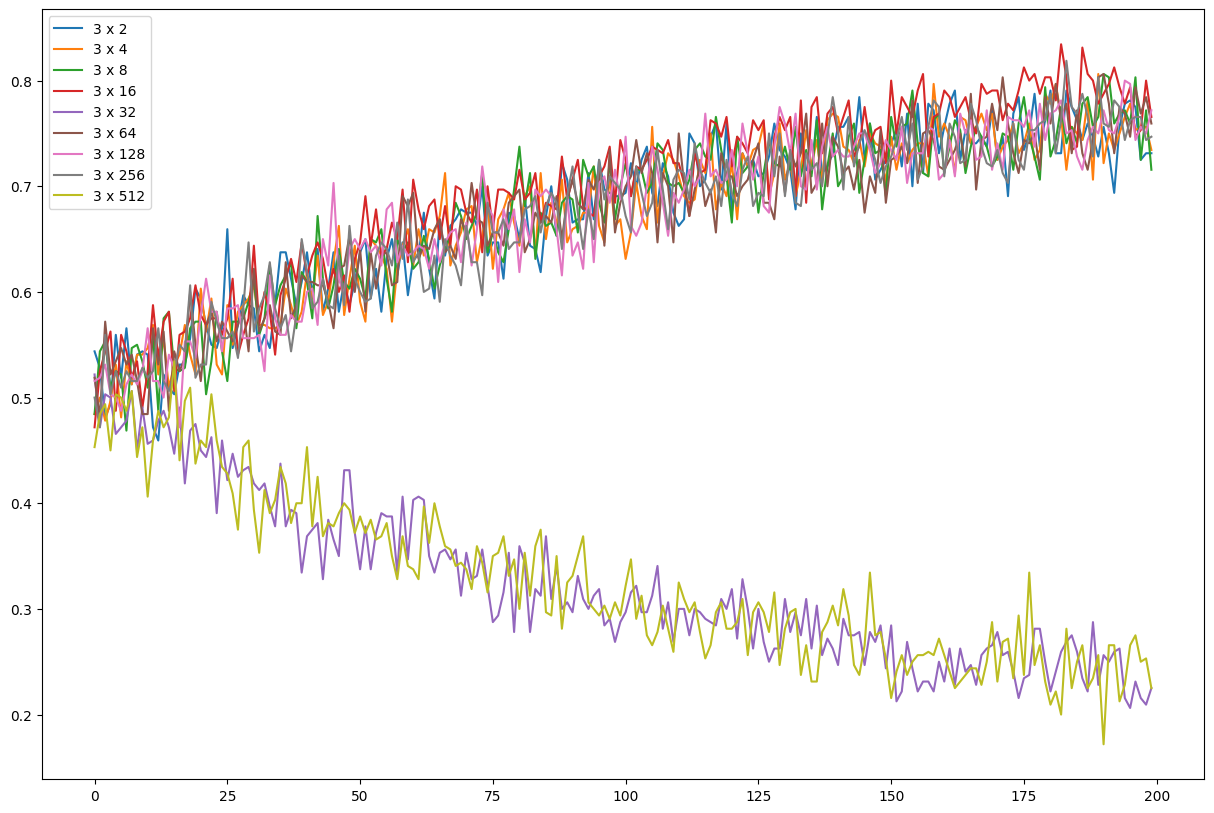

In [6]:
plt.figure(figsize=(15,10))
acc3x2 =griddf["progress"][10]
acc3x4 =griddf["progress"][11]
acc3x8 =griddf["progress"][12]
acc3x16 =griddf["progress"][13]
acc3x32 =griddf["progress"][14]
acc3x64 =griddf["progress"][15]
acc3x128 =griddf["progress"][16]
acc3x256 =griddf["progress"][17]
acc3x512 =griddf["progress"][18]
plt.plot(acc3x2, label='3 x 2')
plt.plot(acc3x4, label='3 x 4')
plt.plot(acc3x8, label='3 x 8')
plt.plot(acc3x16, label='3 x 16')
plt.plot(acc3x32, label='3 x 32')
plt.plot(acc3x64, label='3 x 64')
plt.plot(acc3x128, label='3 x 128')
plt.plot(acc3x256, label='3 x 256')
plt.plot(acc3x512, label='3 x 512')
plt.legend()
plt.show()

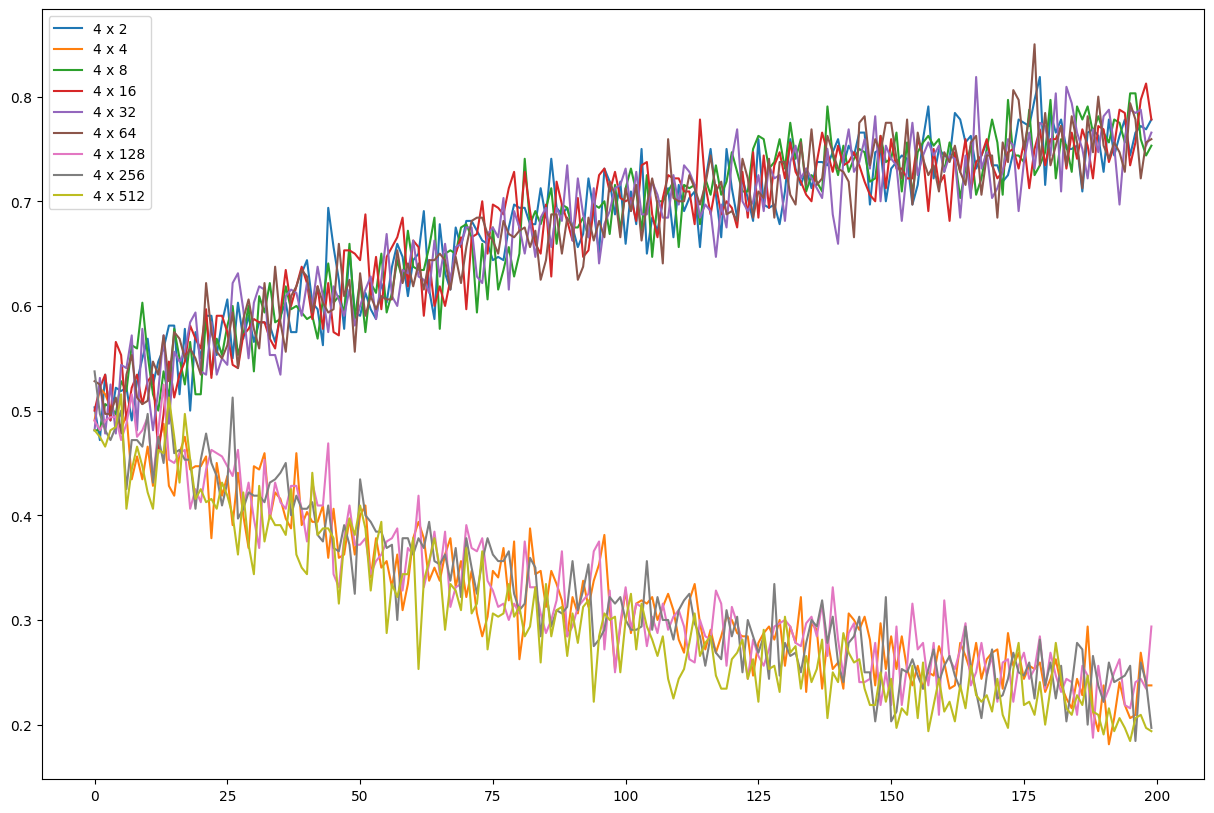

In [7]:
plt.figure(figsize=(15,10))
acc4x2 =griddf["progress"][19]
acc4x4 =griddf["progress"][20]
acc4x8 =griddf["progress"][21]
acc4x16 =griddf["progress"][22]
acc4x32 =griddf["progress"][23]
acc4x64 =griddf["progress"][24]
acc4x128 =griddf["progress"][25]
acc4x256 =griddf["progress"][26]
acc4x512 =griddf["progress"][27]
plt.plot(acc4x2, label='4 x 2')
plt.plot(acc4x4, label='4 x 4')
plt.plot(acc4x8, label='4 x 8')
plt.plot(acc4x16, label='4 x 16')
plt.plot(acc4x32, label='4 x 32')
plt.plot(acc4x64, label='4 x 64')
plt.plot(acc4x128, label='4 x 128')
plt.plot(acc4x256, label='4 x 256')
plt.plot(acc4x512, label='4 x 512')
plt.legend()
plt.show()

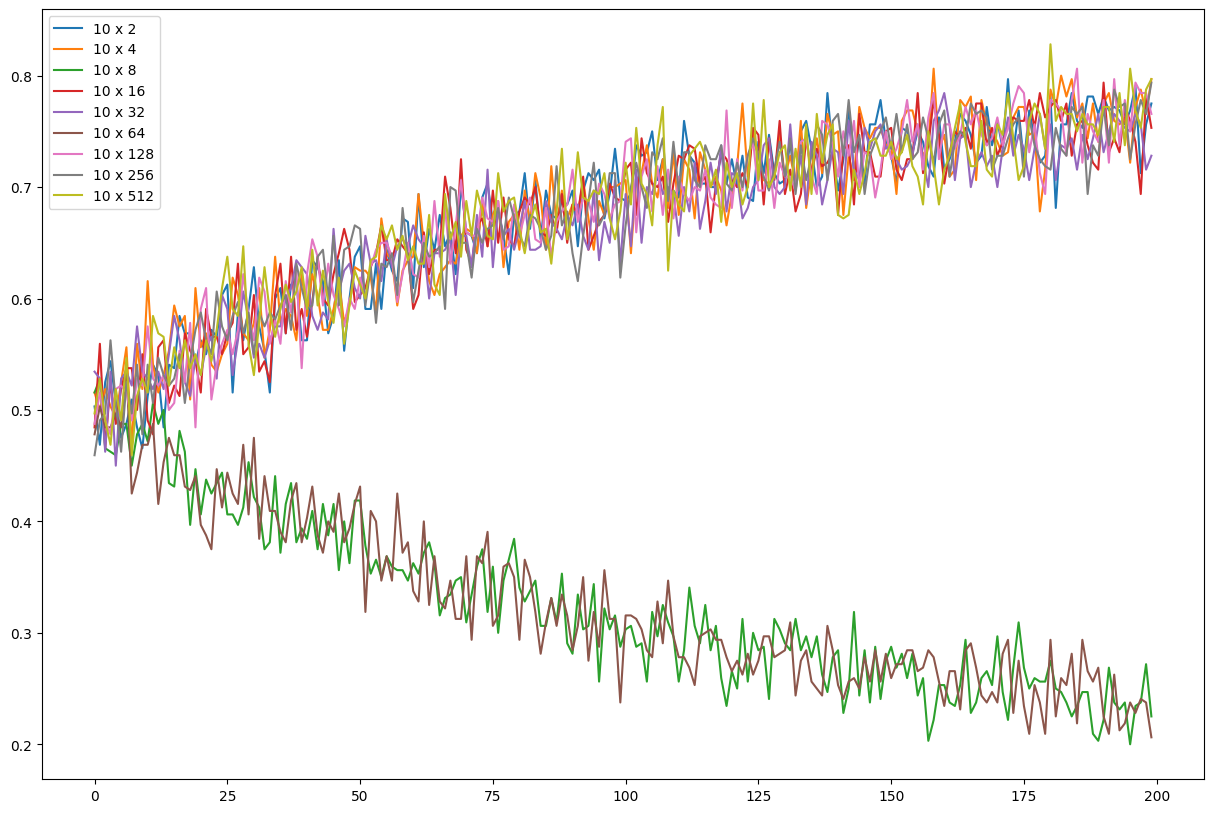

In [8]:
plt.figure(figsize=(15,10))
acc10x2 =griddf["progress"][28]
acc10x4 =griddf["progress"][29]
acc10x8 =griddf["progress"][30]
acc10x16 =griddf["progress"][31]
acc10x32 =griddf["progress"][32]
acc10x64 =griddf["progress"][33]
acc10x128 =griddf["progress"][34]
acc10x256 =griddf["progress"][35]
acc10x512 =griddf["progress"][36]
plt.plot(acc10x2, label='10 x 2')
plt.plot(acc10x4, label='10 x 4')
plt.plot(acc10x8, label='10 x 8')
plt.plot(acc10x16, label='10 x 16')
plt.plot(acc10x32, label='10 x 32')
plt.plot(acc10x64, label='10 x 64')
plt.plot(acc10x128, label='10 x 128')
plt.plot(acc10x256, label='10 x 256')
plt.plot(acc10x512, label='10 x 512')
plt.legend()
plt.show()

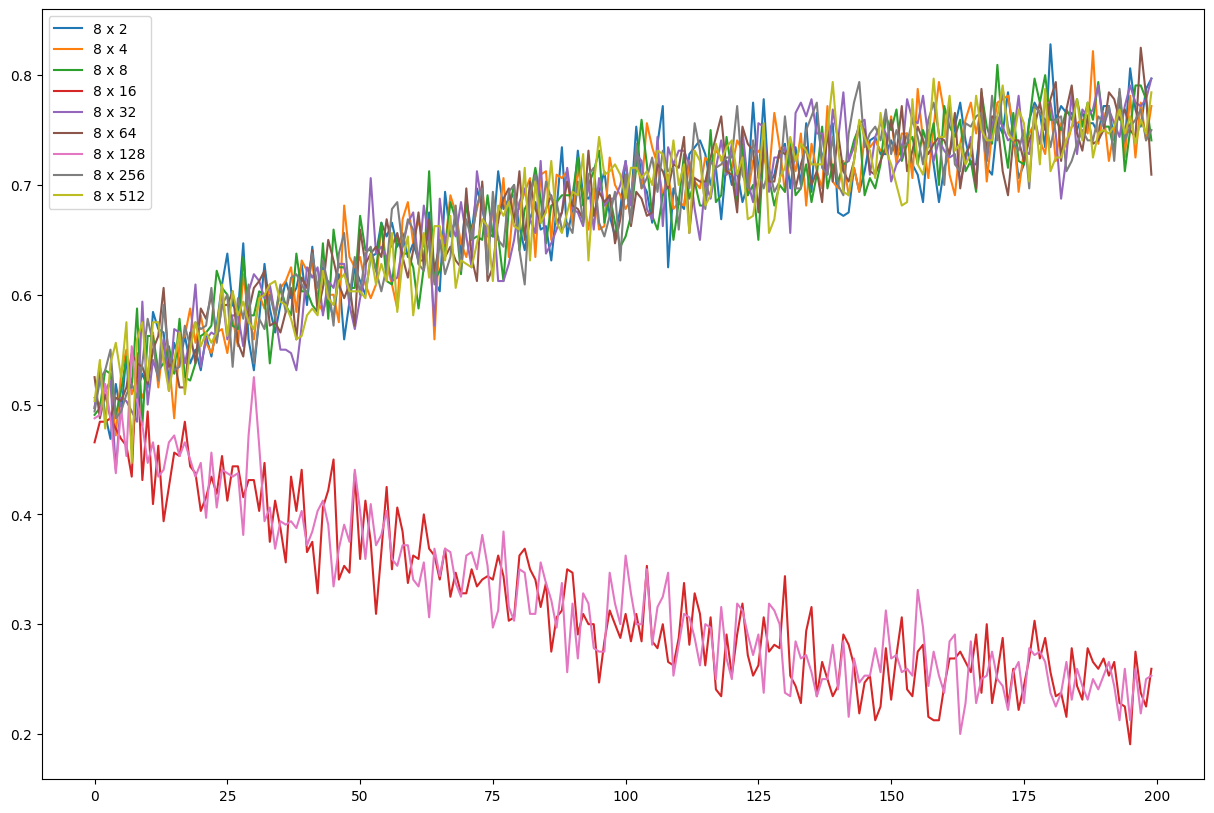

In [5]:
plt.figure(figsize=(15,10))
acc8x2 =griddf["progress"][36]
acc8x4 =griddf["progress"][37]
acc8x8 =griddf["progress"][38]
acc8x16 =griddf["progress"][39]
acc8x32 =griddf["progress"][40]
acc8x64 =griddf["progress"][41]
acc8x128 =griddf["progress"][42]
acc8x256 =griddf["progress"][43]
acc8x512 =griddf["progress"][44]
plt.plot(acc8x2, label='8 x 2')
plt.plot(acc8x4, label='8 x 4')
plt.plot(acc8x8, label='8 x 8')
plt.plot(acc8x16, label='8 x 16')
plt.plot(acc8x32, label='8 x 32')
plt.plot(acc8x64, label='8 x 64')
plt.plot(acc8x128, label='8 x 128')
plt.plot(acc8x256, label='8 x 256')
plt.plot(acc8x512, label='8 x 512')
plt.legend()
plt.show()

In [26]:
data = pd.read_feather("gridresults.feather")


In [5]:
for index, row in griddf.iterrows():
    print(f"{row['layers']}x{row['neurons']}    {row['progress'][-1]}")

0x0    0.0
2x2    0.7125
2x4    0.75
2x8    0.21875
2x16    0.70625
2x32    0.790625
2x64    0.234375
2x128    0.759375
2x256    0.609375
2x512    0.71875
3x2    0.73125
3x4    0.734375
3x8    0.715625
3x16    0.765625
3x32    0.225
3x64    0.759375
3x128    0.771875
3x256    0.746875
3x512    0.225
4x2    0.778125
4x4    0.2375
4x8    0.753125
4x16    0.778125
4x32    0.765625
4x64    0.759375
4x128    0.29375
4x256    0.196875
4x512    0.19375
10x2    0.775
10x4    0.796875
10x8    0.225
10x16    0.753125
10x32    0.728125
10x64    0.20625
10x128    0.765625
10x256    0.79375
8x2    0.796875
8x4    0.771875
8x8    0.740625


In [5]:
print(data)

    layers  neurons                                           progress  \
0        0        0                                    [0.0, 0.0, 0.0]   
1        2        2  [0.484375, 0.503125, 0.55, 0.5125, 0.540625, 0...   
2        2        4  [0.478125, 0.50625, 0.496875, 0.45, 0.4875, 0....   
3        2        8  [0.509375, 0.4625, 0.5, 0.51875, 0.46875, 0.52...   
4        2       16  [0.525, 0.44375, 0.478125, 0.4625, 0.515625, 0...   
5        2       32  [0.49375, 0.471875, 0.484375, 0.5125, 0.525, 0...   
6        2       32  [0.484375, 0.4625, 0.509375, 0.471875, 0.55, 0...   
7        2       64  [0.475, 0.5, 0.453125, 0.4625, 0.4625, 0.48437...   
8        2      128  [0.509375, 0.49375, 0.475, 0.5125, 0.50625, 0....   
9        2       32  [0.45, 0.51875, 0.459375, 0.5, 0.490625, 0.490...   
10       2       64  [0.515625, 0.5125, 0.490625, 0.53125, 0.515625...   
11       4        4                                          [1, 2, 3]   

      traintime  
0      0.000000  
1

In [9]:
data =data.drop([6,9,10,11]).reset_index(drop=True)

KeyError: '[6, 9, 10, 11] not found in axis'

In [18]:
print(data)

   layers  neurons                                           progress  \
0       0        0                                    [0.0, 0.0, 0.0]   
1       2        2  [0.484375, 0.503125, 0.55, 0.5125, 0.540625, 0...   
2       2        4  [0.478125, 0.50625, 0.496875, 0.45, 0.4875, 0....   
3       2        8  [0.509375, 0.4625, 0.5, 0.51875, 0.46875, 0.52...   
4       2       16  [0.525, 0.44375, 0.478125, 0.4625, 0.515625, 0...   
5       2       32  [0.49375, 0.471875, 0.484375, 0.5125, 0.525, 0...   
7       2       64  [0.475, 0.5, 0.453125, 0.4625, 0.4625, 0.48437...   
8       2      128  [0.509375, 0.49375, 0.475, 0.5125, 0.50625, 0....   

     traintime  
0     0.000000  
1 -1735.979855  
2 -1823.179430  
3  1728.703833  
4  1796.003145  
5  1885.860660  
7  3505.070723  
8  2040.191225  


In [19]:
data = data.reset_index(drop=True)

In [20]:
data

layers  neurons                                           progress  \
0       0        0                                    [0.0, 0.0, 0.0]   
1       2        2  [0.484375, 0.503125, 0.55, 0.5125, 0.540625, 0...   
2       2        4  [0.478125, 0.50625, 0.496875, 0.45, 0.4875, 0....   
3       2        8  [0.509375, 0.4625, 0.5, 0.51875, 0.46875, 0.52...   
4       2       16  [0.525, 0.44375, 0.478125, 0.4625, 0.515625, 0...   
5       2       32  [0.49375, 0.471875, 0.484375, 0.5125, 0.525, 0...   
6       2       64  [0.475, 0.5, 0.453125, 0.4625, 0.4625, 0.48437...   
7       2      128  [0.509375, 0.49375, 0.475, 0.5125, 0.50625, 0....   

     traintime  
0     0.000000  
1 -1735.979855  
2 -1823.179430  
3  1728.703833  
4  1796.003145  
5  1885.860660  
6  3505.070723  
7  2040.191225

In [21]:
data.to_feather("gridresults.feather")

In [3]:
import pandas as pd
smdf = pd.read_feather("strangemodels.feather")
smdf

version  layers  neurons  \
0      999       0        0   
1        0      10       64   
2        1      10       64   
3        0       2       32   
4        1       2       32   
5        2       2       32   

                                            progress    traintime  
0                                    [0.0, 0.0, 0.0]     0.000000  
1  [0.525, 0.49375, 0.53125, 0.5125, 0.5375, 0.51...  1765.429543  
2  [0.48125, 0.575, 0.503125, 0.490625, 0.5375, 0...  1873.096157  
3  [0.490625, 0.515625, 0.553125, 0.4875, 0.46875...  3149.218633  
4  [0.490625, 0.496875, 0.534375, 0.475, 0.521875...  1917.453303  
5  [0.4875, 0.50625, 0.48125, 0.53125, 0.465625, ...  2275.524373

In [4]:
for index, row in smdf.iterrows():
    print(f"{row['layers']}x{row['neurons']}    {row['progress'][-1]}")

0x0    0.0
10x64    0.775
10x64    0.784375
2x32    0.7625
2x32    0.5125
2x32    0.4375


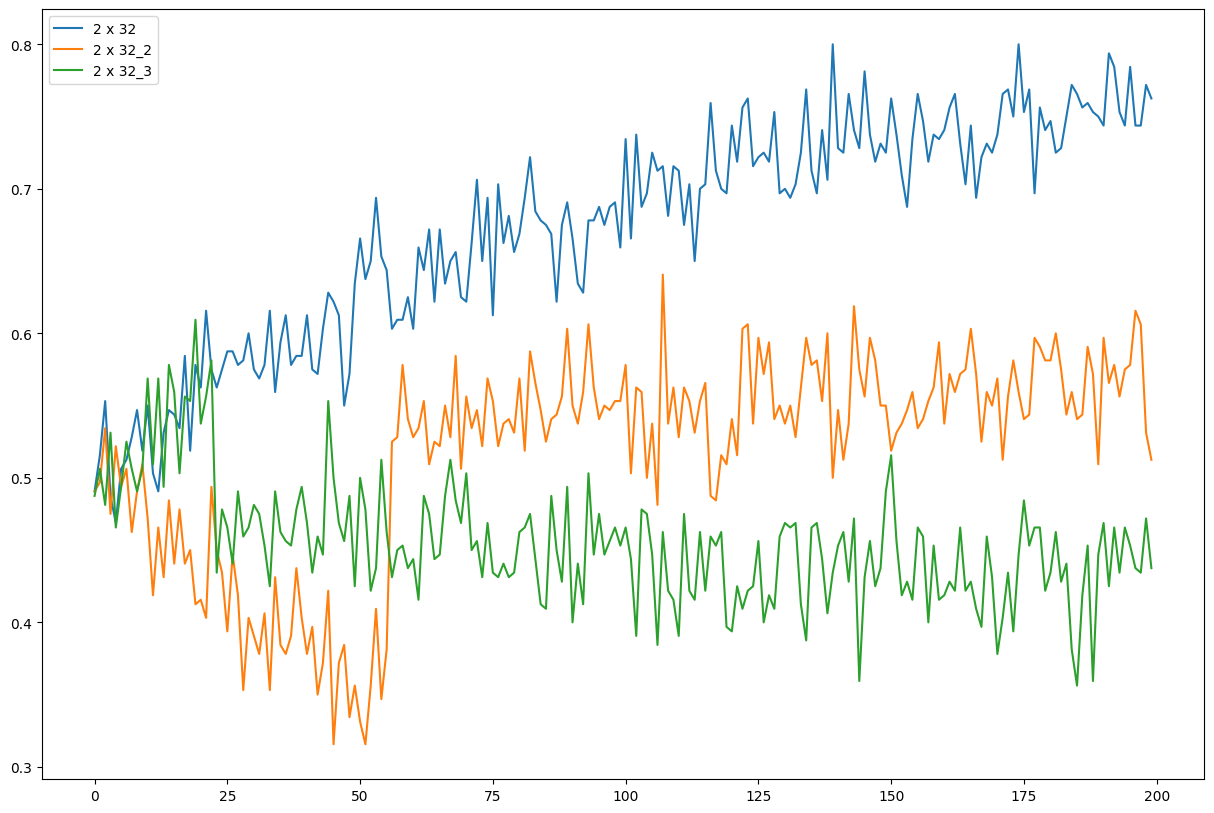

In [10]:
plt.figure(figsize=(15,10))
acc10x64 =smdf["progress"][1]
acc10x64_2 =smdf["progress"][2]
acc2x32 =smdf["progress"][3]
acc2x32_2 =smdf["progress"][4]
acc2x32_3 =smdf["progress"][5]
#plt.plot(acc10x64, label='10 x 64')
#plt.plot(acc10x64_2, label='10 x 64')
plt.plot(acc2x32, label='2 x 32')
plt.plot(acc2x32_2, label='2 x 32_2')
plt.plot(acc2x32_3, label='2 x 32_3')
plt.legend()
plt.show()

In [12]:
import gymnasium as gym
from gymnasium import spaces

df = pd.read_feather("norm_bin_31feat_CIC2017.feather")


action_size = 2

class MyEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self, data):
        self.action_space = spaces.Discrete(2)  # 2 possible actions
        # self.observation_space = spaces.Discrete(1) # only one observation needed
        # self.reward_range = (-1, 1) # rewards range from -1 to 1
        self.data = data  # dataset
        self.datasize = data.shape[1] - 1  # amount of features
        self.datapoints = data.shape[0] - 1
        self.index = 0  # index of the current data point
        self.state = None

    def step(self, action):
        label = self.data.at[self.index, ' Label']  # get label from dataset
        if action == label:
            reward = 1  # match, give positive reward
        else:
            reward = 0  # not matching, give negative reward
        self.index = random.randint(0, self.datapoints)  # move to next data point
            # row = self.data.get_chunk(1)
            # if row.empty:
            #    self.done = True
            #    return 0,0,self.done,{}
            # self.state= row.iloc[:,1:-1].values
            # self.label = row.iloc[:,-1:].values

        self.state = self.data.iloc[self.index, :-1].values.reshape(1, self.datasize)
        return self.state, reward, {}

    def reset(self):
        self.index = random.randint(0, self.datapoints)
        self.state = self.data.iloc[self.index, :-1].values.reshape(1, self.datasize)
        return self.state

    def render(self, mode='human', close=False):
        pass


env = MyEnv(df)

state_size = env.datasize


class DQNAgent:
    def __init__(self, state_size, action_size, layer_amount, neurons):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.99  # discount rate
        self.epsilon = 0.99  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99
        self.learning_rate = 0.001
        self.model = self._build_model(layer_amount, neurons)

    def _build_model(self, layer_amount, neurons):
        model = keras.Sequential()
        model.add(layers.Dense(neurons, input_dim=self.state_size, activation='relu'))
        for i in range(layer_amount):
            model.add(layers.Dense(neurons, activation='relu'))
        model.add(layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate),
                      metrics=["Accuracy"])
        return model

    def remember(self, state, action, reward):
        self.memory.append((state, action, reward))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):

        minibatch = random.sample(self.memory, batch_size)

        for state, action, reward in minibatch:
            target = reward + self.gamma * np.amax(self.model.predict(state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

In [13]:
agent = DQNAgent(state_size, action_size, 2 - 1, 32)
agent.load("99_99_2x32_2.h5")

2/2 [==============================] - 0s 3ms/step


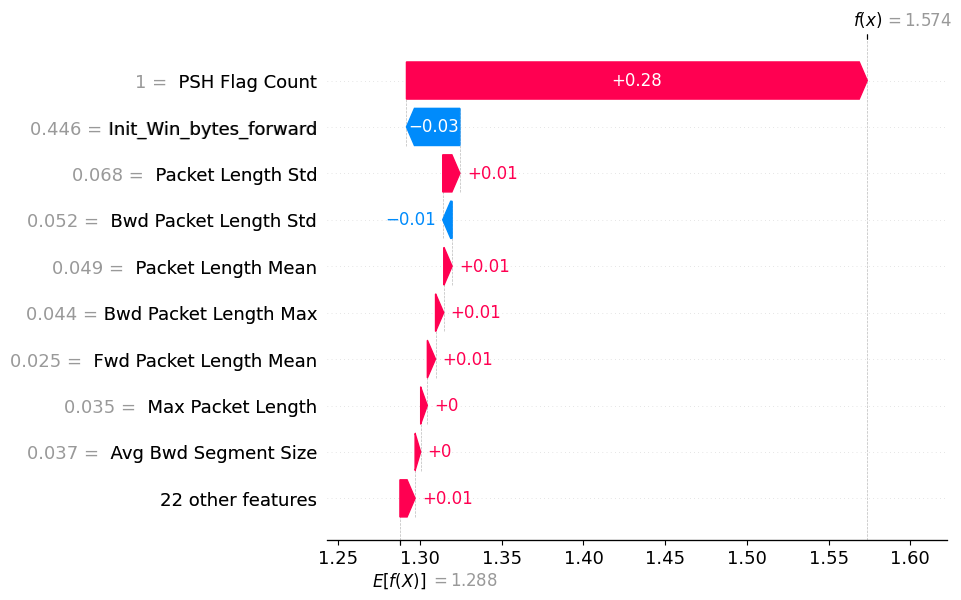

In [14]:
import shap

data = df.sample(n=3)
X=data.iloc[:,:-1]

explainer = shap.Explainer(agent.model.predict,data.iloc[:,:-1])

sv = explainer(data.iloc[:,:-1])

exp = shap.Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X.values, 
                  feature_names=X.columns)
idx = 0
shap.plots.waterfall(exp[idx])

In [13]:
agent = DQNAgent(state_size, action_size, 2 - 1, 32)
agent.load("99_99_2x32_1.h5")

C:\Users\kahre\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2/2 [==============================] - 0s 2ms/step


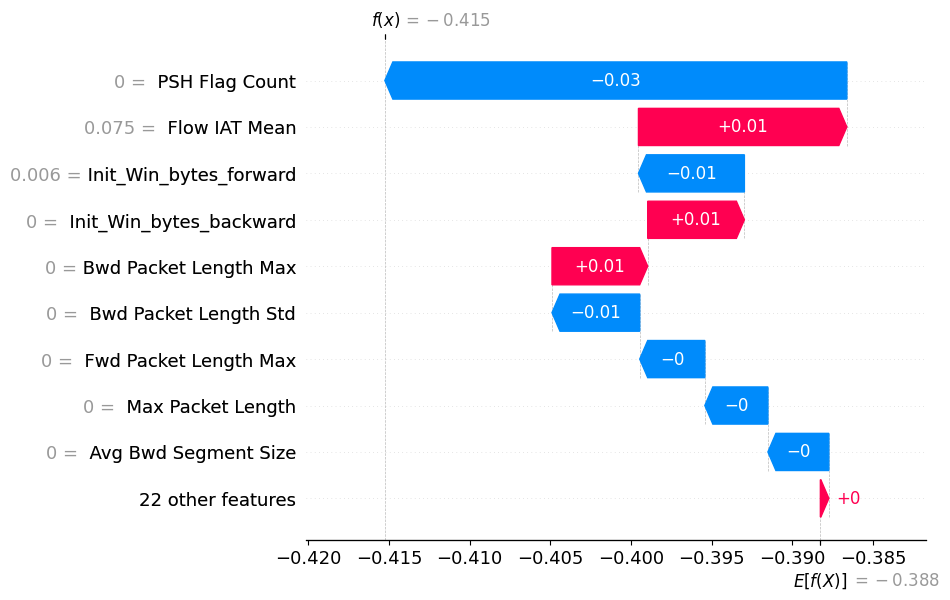

In [14]:
import shap

data = df.sample(n=3)
X=data.iloc[:,:-1]

explainer = shap.Explainer(agent.model.predict,data.iloc[:,:-1])

sv = explainer(data.iloc[:,:-1])

exp = shap.Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X.values, 
                  feature_names=X.columns)
idx = 0
shap.plots.waterfall(exp[idx])

In [15]:
agent = DQNAgent(state_size, action_size, 2 - 1, 32)
agent.load("99_99_2x32_0.h5")

2/2 [==============================] - 0s 4ms/step


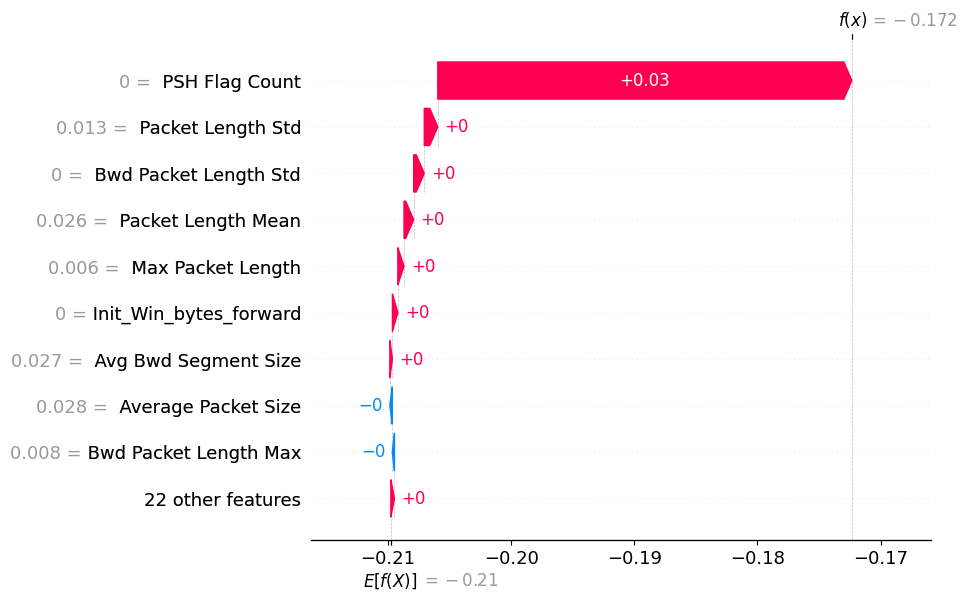

In [16]:
import shap

data = df.sample(n=3)
X=data.iloc[:,:-1]

explainer = shap.Explainer(agent.model.predict,data.iloc[:,:-1])

sv = explainer(data.iloc[:,:-1])

exp = shap.Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X.values, 
                  feature_names=X.columns)
idx = 0
shap.plots.waterfall(exp[idx])

In [17]:
agent = DQNAgent(state_size, action_size, 10 - 1, 64)
agent.load("99_99_10x64_1.h5")

2/2 [==============================] - 0s 3ms/step


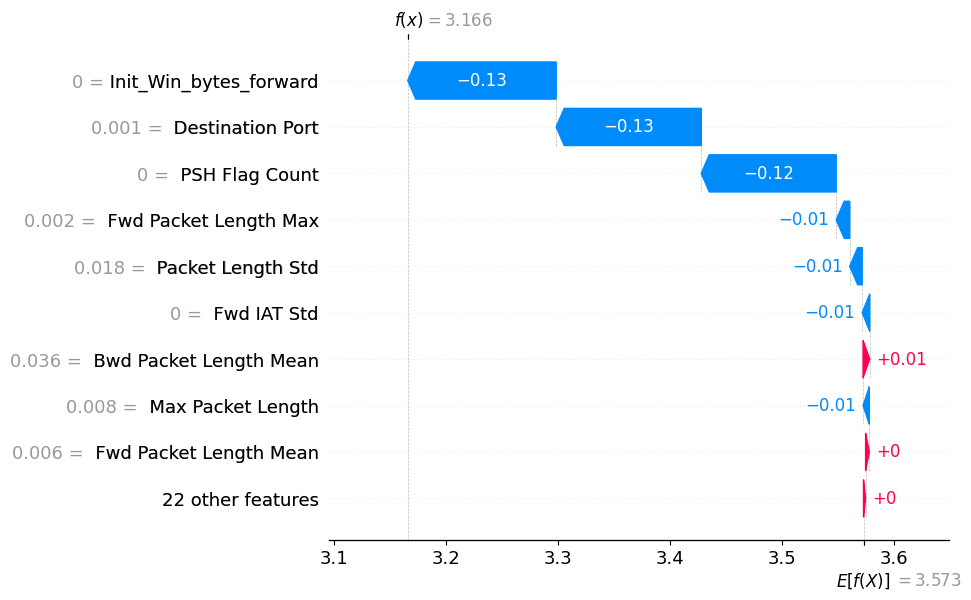

In [19]:
import shap

data = df.sample(n=3)
X=data.iloc[:,:-1]

explainer = shap.Explainer(agent.model.predict,data.iloc[:,:-1])

sv = explainer(data.iloc[:,:-1])

exp = shap.Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X.values, 
                  feature_names=X.columns)
idx = 0
shap.plots.waterfall(exp[idx])

In [15]:
agent = DQNAgent(state_size, action_size, 10 - 1, 64)
agent.load("99_99_10x64_1.h5")

2/2 [==============================] - 0s 2ms/step


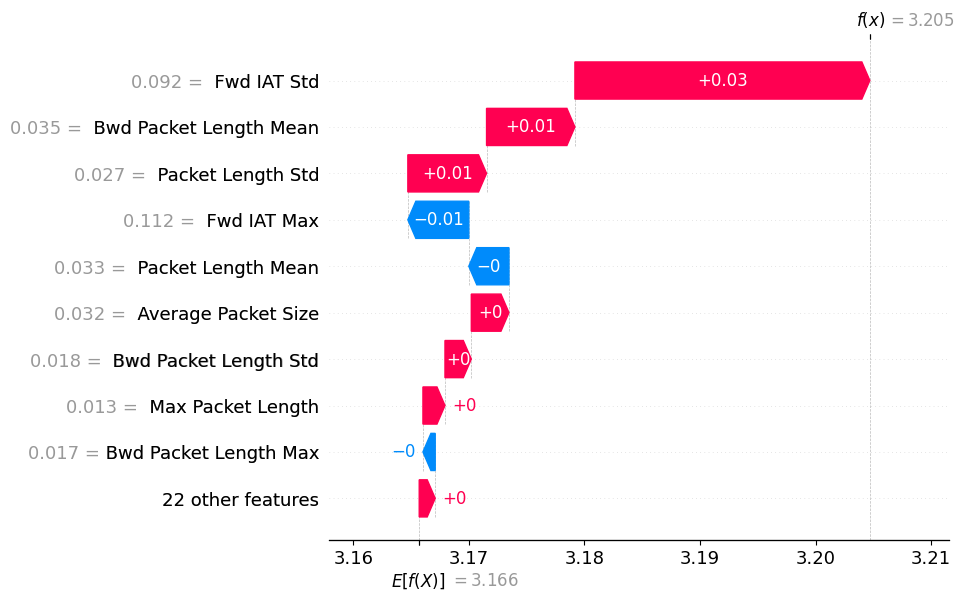

In [16]:
import shap

data = df.sample(n=3)
X=data.iloc[:,:-1]

explainer = shap.Explainer(agent.model.predict,data.iloc[:,:-1])

sv = explainer(data.iloc[:,:-1])

exp = shap.Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X.values, 
                  feature_names=X.columns)
idx = 0
shap.plots.waterfall(exp[idx])

In [2]:
import pandas as pd
erdf = pd.read_feather("epsilonresults.feather")
erdf

epsilon  decay  layers  neurons  \
0    0.010  0.010       0        0   
1    0.995  0.995       2       32   
2    0.995  0.990       2       32   
3    0.995  0.950       2       32   
4    0.995  0.900       2       32   
5    0.995  0.999       2       32   

                                            progress    traintime  
0                                    [0.0, 0.0, 0.0]     0.000000  
1  [0.45, 0.496875, 0.5, 0.475, 0.55, 0.50625, 0....  1339.773458  
2  [0.44375, 0.478125, 0.53125, 0.471875, 0.54062...  1922.971866  
3  [0.5, 0.45625, 0.440625, 0.44375, 0.425, 0.418...  2462.868211  
4  [0.521875, 0.453125, 0.390625, 0.471875, 0.412...  5411.170709  
5  [0.534375, 0.484375, 0.4875, 0.528125, 0.5375,...   809.962976

In [18]:
for index, row in erdf.iterrows():
    print(f"{row['epsilon']}x{row['decay']}    {row['progress'][-1]}")

0.01x0.01    0.0
0.995x0.995    0.671875
0.995x0.99    0.8
0.995x0.95    0.190625
0.995x0.9    0.20625


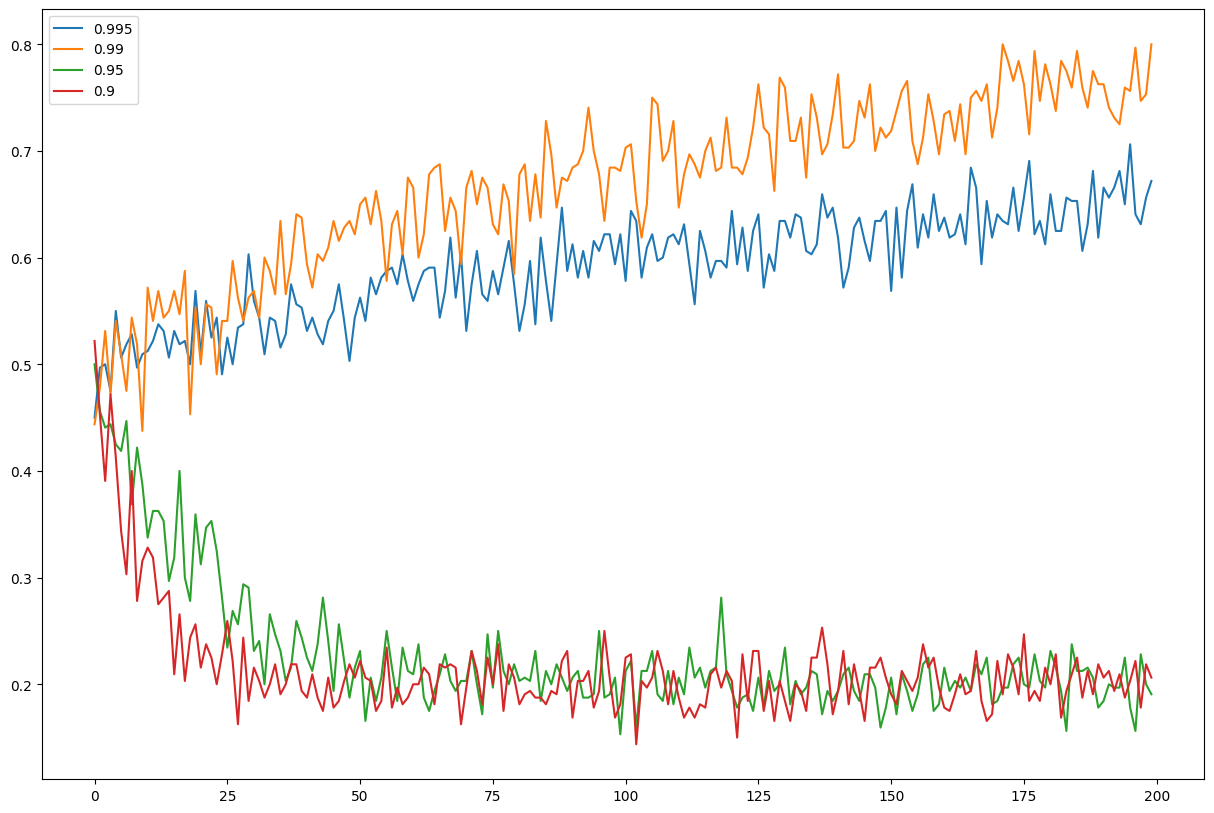

In [19]:
plt.figure(figsize=(15,10))
acc0995 =erdf["progress"][1]
acc099 =erdf["progress"][2]
acc095 =erdf["progress"][3]
acc09 =erdf["progress"][4]
plt.plot(acc0995, label='0.995')
plt.plot(acc099, label='0.99')
plt.plot(acc095, label='0.95')
plt.plot(acc09, label='0.9')
plt.legend()
plt.show()

In [14]:
import pandas as pd
ferdf = pd.read_feather("full_epsilonresults.feather")
ferdf

epsilon   decay  layers  neurons  \
0     0.010  0.0100       0        0   
1     0.995  0.9990       2       32   
2     0.995  0.9950       2       32   
3     0.995  0.9975       2       32   
4     0.995  0.9990       2       32   
5     0.995  0.9975       2       32   
6     0.995  0.9950       2       32   
7     0.995  0.9990       2       32   
8     0.995  0.9975       2       32   
9     0.995  0.9950       2       32   
10    0.995  0.9925       2       32   
11    0.995  0.9900       2       32   
12    0.995  0.9925       2       32   
13    0.995  0.9900       2       32   
14    0.995  0.9925       2       32   
15    0.995  0.9900       2       32   
16    0.995  0.9985       2       32   

                                             progress    traintime  episodes  \
0                                     [0.0, 0.0, 0.0]     0.000000        10   
1   [0.453125, 0.490625, 0.49375, 0.50625, 0.47812...  2596.754137       500   
2   [0.50625, 0.540625, 0.540625, 0.5125, 0.54375,...  4758.727952       500   
3   [0.515625, 0.50625, 0.484375, 0.4875, 0.4875, ...  7640.663065       500   
4   [0.4875, 0.534375, 0.48125, 0.54375, 0.521875,...  1386.915892      1000   
5   [0.471875, 0.465625, 0.4875, 0.55, 0.4625, 0.4...  1487.052572      1000   
6   [0.5125, 0.51875, 0.521875, 0.55, 0.51875, 0.4...  1589.832741      1000   
7   [0.478125, 0.484375, 0.5125, 0.465625, 0.45937...  2915.895752      2000   
8   [0.521875, 0.475, 0.5125, 0.5875, 0.5, 0.48125...  3245.589762      2000   
9   [0.540625, 0.46875, 0.484375, 0.515625, 0.5031...  6411.648305      2000   
10  [0.48125, 0.475, 0.45625, 0.503125, 0.49375, 0...   750.435853       500   
11  [0.5, 0.55625, 0.51875, 0.490625, 0.459375, 0....   758.438962       500   
12  [0.490625, 0.496875, 0.478125, 0.484375, 0.518...  1544.333757      1000   
13  [0.509375, 0.534375, 0.521875, 0.515625, 0.512...  1609.720936      1000   
14  [0.515625, 0.45625, 0.528125, 0.515625, 0.5218...  4365.979901      2000   
15  [0.51875, 0.534375, 0.55, 0.5, 0.54375, 0.5125...  5168.667686      2000   
16  [0.525, 0.50625, 0.515625, 0.521875, 0.546875,...  3883.033707      2000   

    endepsilon  
0     0.100000  
1     0.603347  
2     0.081164  
3     0.284626  
4     0.365857  
5     0.081419  
6     0.009986  
7     0.134524  
8     0.009994  
9     0.009986  
10    0.023072  
11    0.009971  
12    0.009929  
13    0.009971  
14    0.009929  
15    0.009971  
16    0.049427

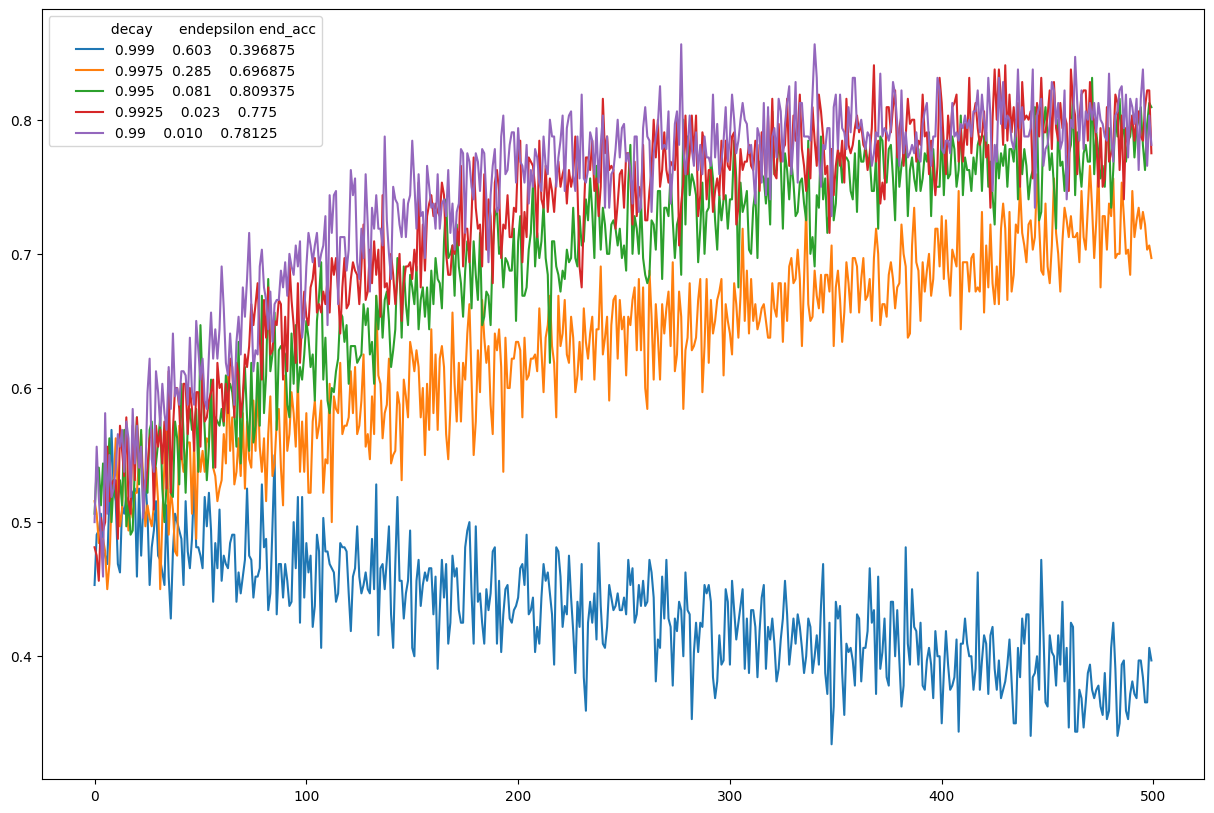

In [5]:
plt.figure(figsize=(15,10))
dec9990 =ferdf["progress"][1]
dec9950 =ferdf["progress"][2]
dec9975 =ferdf["progress"][3]
dec9925 =ferdf["progress"][10]
dec9900 =ferdf["progress"][11]
#acc09 =ferdf["progress"][4]
plt.plot(dec9990, label=f'0.999    {ferdf["endepsilon"][1]:.3f}    {dec9990[-1]}')
plt.plot(dec9975, label=f'0.9975  {ferdf["endepsilon"][3]:.3f}    {dec9975[-1]}')
plt.plot(dec9950, label=f'0.995    {ferdf["endepsilon"][2]:.3f}    {dec9950[-1]}')
plt.plot(dec9925, label=f'0.9925    {ferdf["endepsilon"][10]:.3f}    {dec9925[-1]}')
plt.plot(dec9900, label=f'0.99    {ferdf["endepsilon"][11]:.3f}    {dec9900[-1]}')
#plt.plot(acc099, label='0.99')
#plt.plot(acc095, label='0.95')
#plt.plot(acc09, label='0.9')
plt.legend(title="             decay      endepsilon end_acc")
plt.show()

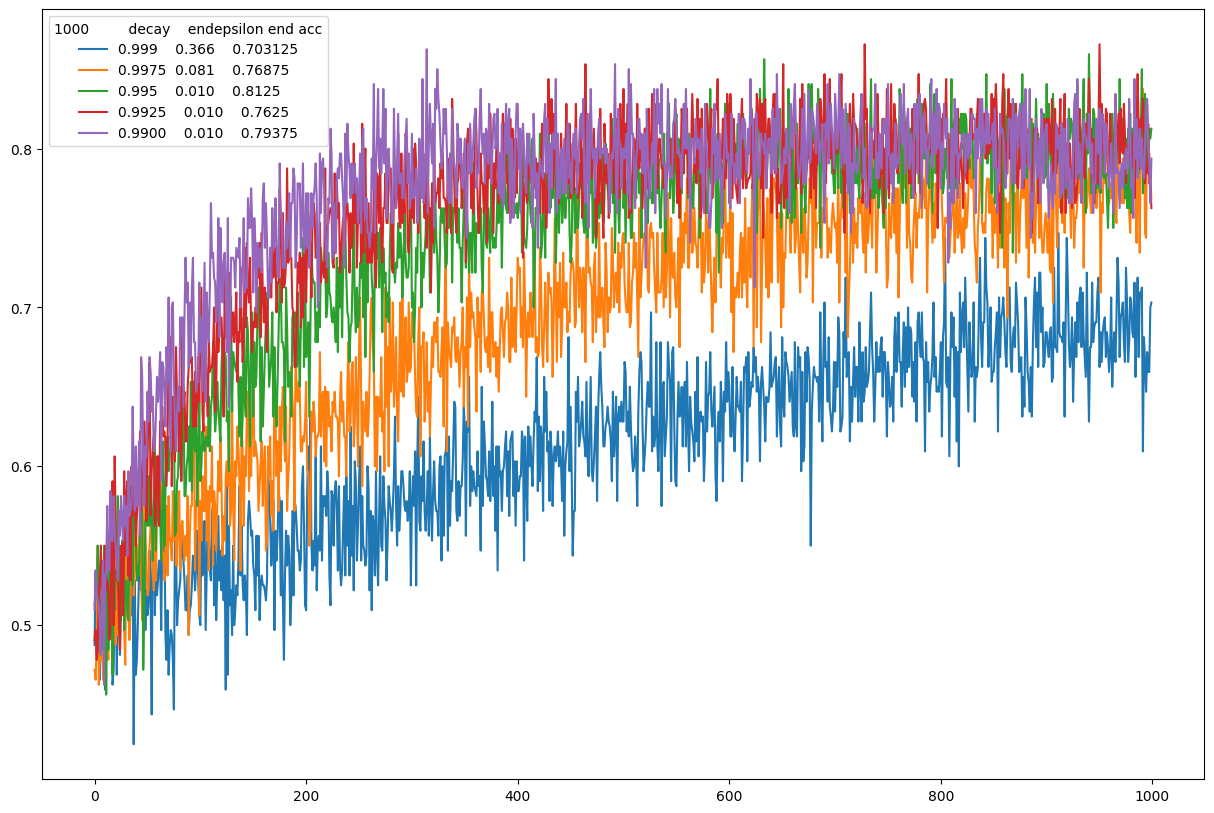

In [6]:
plt.figure(figsize=(15,10))
dec9990 =ferdf["progress"][4]
dec9975 =ferdf["progress"][5]
dec9950 =ferdf["progress"][6]
dec9925 =ferdf["progress"][12]
dec9900 =ferdf["progress"][13]
#acc09 =ferdf["progress"][4]
plt.plot(dec9990, label=f'0.999    {ferdf["endepsilon"][4]:.3f}    {dec9990[-1]}')
plt.plot(dec9975, label=f'0.9975  {ferdf["endepsilon"][5]:.3f}    {dec9975[-1]}')
plt.plot(dec9950, label=f'0.995    {ferdf["endepsilon"][6]:.3f}    {dec9950[-1]}')
plt.plot(dec9925, label=f'0.9925    {ferdf["endepsilon"][12]:.3f}    {dec9925[-1]}')
plt.plot(dec9900, label=f'0.9900    {ferdf["endepsilon"][13]:.3f}    {dec9900[-1]}')
#plt.plot(acc099, label='0.99')
#plt.plot(acc095, label='0.95')
#plt.plot(acc09, label='0.9')
plt.legend(title="1000         decay    endepsilon end acc")
plt.show()

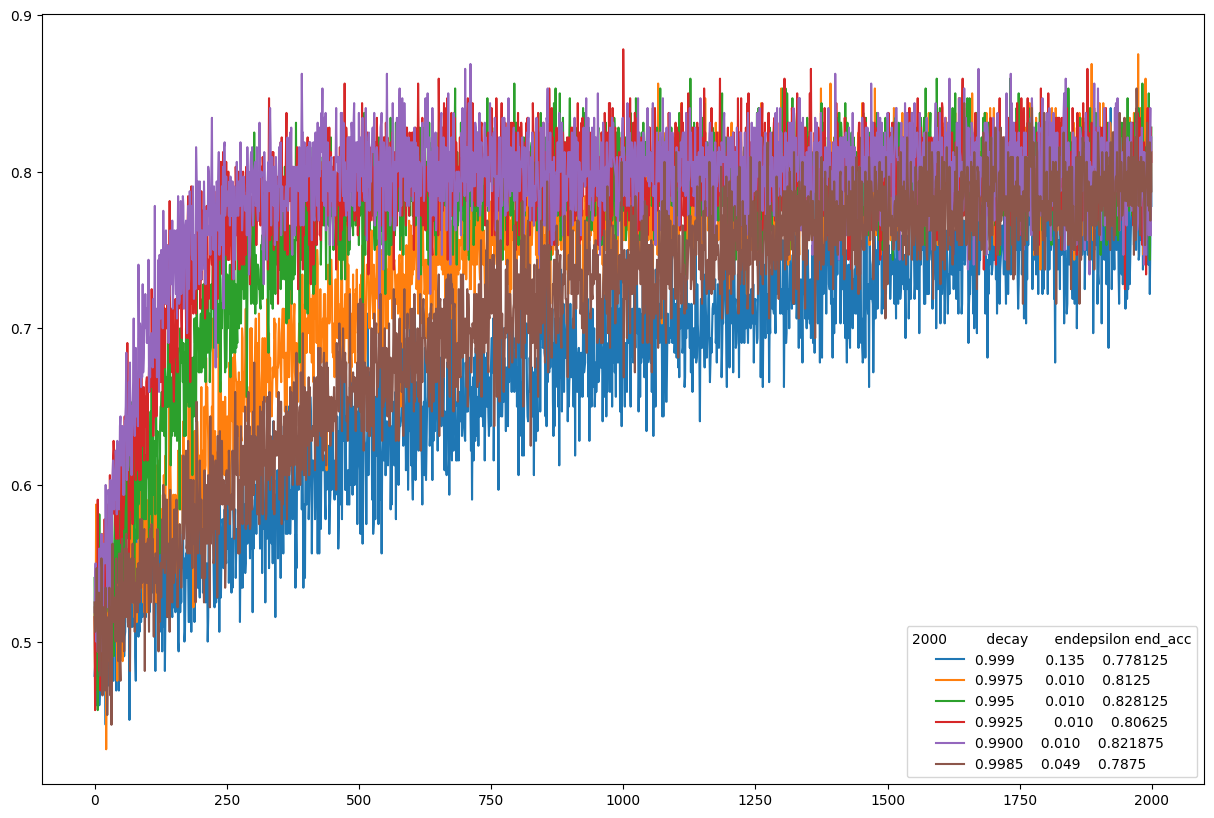

In [15]:
plt.figure(figsize=(15,10))
dec9990 =ferdf["progress"][7]
dec9975 =ferdf["progress"][8]
dec9950 =ferdf["progress"][9]
dec9925 =ferdf["progress"][14]
dec9900 =ferdf["progress"][15]
dec9985 = ferdf["progress"][16]
#acc09 =ferdf["progress"][4]
plt.plot(dec9990, label=f'0.999       {ferdf["endepsilon"][7]:.3f}    {dec9990[-1]}')
plt.plot(dec9975, label=f'0.9975     {ferdf["endepsilon"][8]:.3f}    {dec9975[-1]}')
plt.plot(dec9950, label=f'0.995       {ferdf["endepsilon"][9]:.3f}    {dec9950[-1]}')
plt.plot(dec9925, label=f'0.9925       {ferdf["endepsilon"][14]:.3f}    {dec9925[-1]}')
plt.plot(dec9900, label=f'0.9900    {ferdf["endepsilon"][15]:.3f}    {dec9900[-1]}')
plt.plot(dec9985, label=f'0.9985    {ferdf["endepsilon"][16]:.3f}    {dec9985[-1]}')
#plt.plot(acc099, label='0.99')
#plt.plot(acc095, label='0.95')
#plt.plot(acc09, label='0.9')
plt.legend(title="2000         decay      endepsilon end_acc")
plt.show()

In [12]:
import pandas as pd
rrdf = pd.read_feather("reward_results.feather")
rrdf

epsilon  decay  layers  neurons  \
0    0.010  0.010       0        0   
1    0.995  0.995       2       32   
2    0.995  0.995       2       32   
3    0.995  0.995       2       32   

                                            progress    traintime  episodes  \
0                                    [0.0, 0.0, 0.0]     0.000000        10   
1  [0.475, 0.46875, 0.45625, 0.50625, 0.525, 0.50...  3101.000722      2000   
2  [0.565625, 0.496875, 0.490625, 0.446875, 0.456...  6253.744571      2000   
3  [0.471875, 0.51875, 0.521875, 0.515625, 0.5062...  6319.088610      2000   

   endepsilon  penalty  
0    0.100000        0  
1    0.009986        1  
2    0.009986        1  
3    0.009986        1

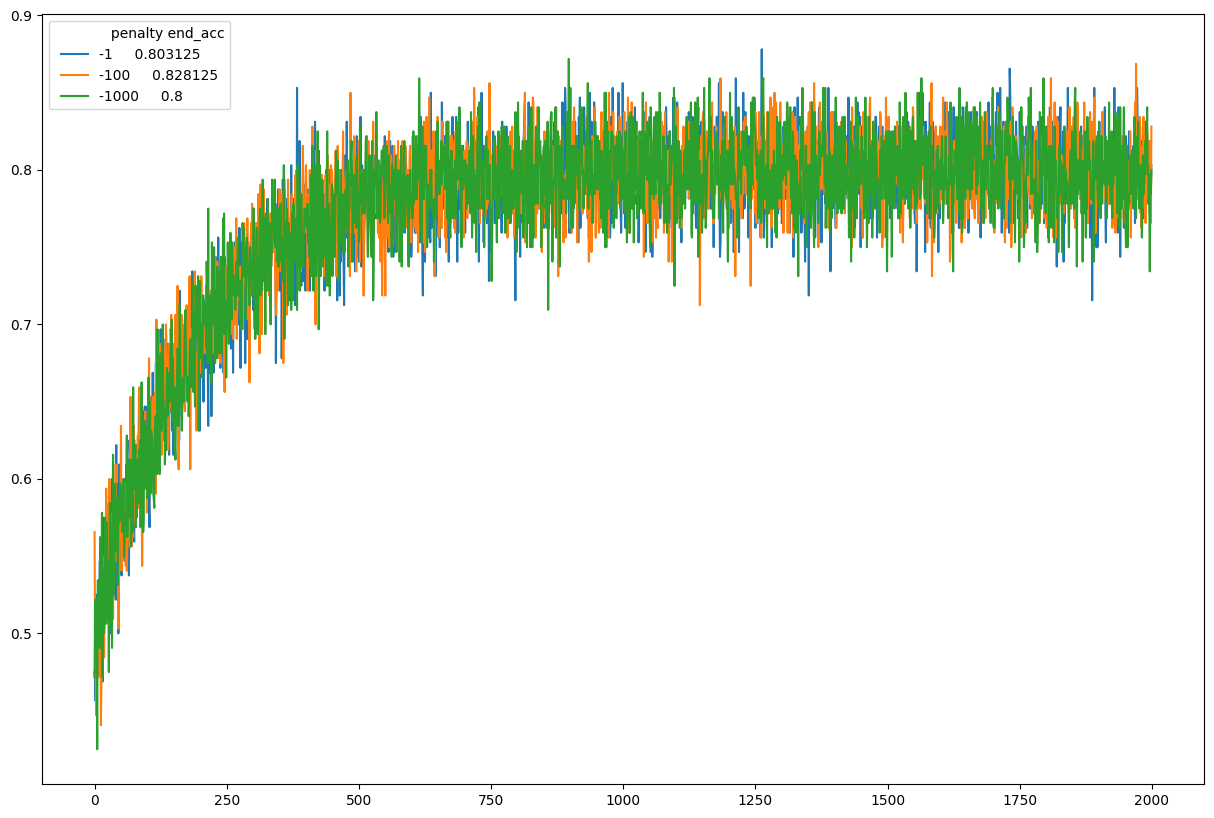

In [13]:
plt.figure(figsize=(15,10))
pen1 = rrdf["progress"][1]
pen100 = rrdf["progress"][2]
pen1000 = rrdf["progress"][3]

#acc09 =ferdf["progress"][4]
plt.plot(pen1, label=f'-1     {pen1[-1]}')
plt.plot(pen100, label=f'-100     {pen100[-1]}')
plt.plot(pen1000, label=f'-1000     {pen1000[-1]}')

#plt.plot(acc095, label='0.95')
#plt.plot(acc09, label='0.9')
plt.legend(title="             penalty end_acc")
plt.show()

In [2]:
import pandas as pd
ldf = pd.read_feather("learn_results.feather")
ldf

epsilon  decay  layers  neurons  \
0    0.010  0.010       0        0   
1    0.995  0.996       3       64   

                                            progress     traintime  episodes  \
0                                    [0.0, 0.0, 0.0]      0.000000        10   
1  [0.51875, 0.4625, 0.50625, 0.528125, 0.50625, ...  56347.963454      2000   

   endepsilon  penalty  learnrate  
0    0.100000        0        0.0  
1    0.009989        0        0.1